# Circuits Endpoint Analysis

## Questions

1. How has the geographical distribution of circuits changed over time? (Geographical Distribution of Circuits)
2. What are the characteristics of circuits that have remained active for the longest period? (Trends over time)
3. Are there any patterns in the emergence or discontinuation of circuits related to global or regional events? (Would require more data)
4. Which countries and localities have hosted the most circuits, and what does this indicate about the global landscape of motorsport? (Country and Locality Analysis)
5. What trends can be observed in the types of circuits (e.g., street circuits vs. dedicated race tracks) over time? (Circuit Type Analysis)
6. Can we predict future locations for motorsports circuits based on past trends and current data?

## Findings

## Import Required Libraries

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [2]:
# import dataset
df = pd.read_csv("../data/all_circuits_1950_2023.csv")

In [3]:
# dataset
df.head(6)

,circuitId,url,circuitName,Location.lat,Location.long,Location.locality,Location.country,Year
0,bremgarten,http://en.wikipedia.org/wiki/Circuit_Bremgarten,Circuit Bremgarten,46.9589,7.40194,Bern,Switzerland,1950
1,indianapolis,http://en.wikipedia.org/wiki/Indianapolis_Moto...,Indianapolis Motor Speedway,39.7950,-86.23470,Indianapolis,USA,1950
2,monaco,http://en.wikipedia.org/wiki/Circuit_de_Monaco,Circuit de Monaco,43.7347,7.42056,Monte-Carlo,Monaco,1950
3,monza,http://en.wikipedia.org/wiki/Autodromo_Naziona...,Autodromo Nazionale di Monza,45.6156,9.28111,Monza,Italy,1950
4,reims,http://en.wikipedia.org/wiki/Reims-Gueux,Reims-Gueux,49.2542,3.93083,Reims,France,1950
5,silverstone,http://en.wikipedia.org/wiki/Silverstone_Circuit,Silverstone Circuit,52.0786,-1.01694,Silverstone,UK,1950


## Data Exploration

In [4]:
print(f"Columns of the dataset: {df.columns}")
print(f"Size of the dataset: {df.size}")

Columns of the dataset: Index(['circuitId', 'url', 'circuitName', 'Location.lat', 'Location.long',
       'Location.locality', 'Location.country', 'Year'],
      dtype='object')
Size of the dataset: 8776


In [5]:
# unique IDs
print(f"Number of unique IDs: {df.circuitId.nunique()}")
print(f"Unique circuitId: {df['circuitId'].unique()}")

Number of unique IDs: 77
Unique circuitId: ['bremgarten' 'indianapolis' 'monaco' 'monza' 'reims' 'silverstone' 'spa'
 'nurburgring' 'pedralbes' 'essarts' 'zandvoort' 'galvez' 'aintree'
 'pescara' 'ain-diab' 'boavista' 'avus' 'monsanto' 'sebring' 'riverside'
 'watkins_glen' 'george' 'rodriguez' 'brands_hatch' 'zeltweg' 'charade'
 'kyalami' 'lemans' 'mosport' 'jarama' 'tremblant' 'montjuic'
 'hockenheimring' 'red_bull_ring' 'ricard' 'nivelles' 'anderstorp'
 'interlagos' 'zolder' 'dijon' 'fuji' 'long_beach' 'jacarepagua'
 'villeneuve' 'imola' 'las_vegas' 'detroit' 'dallas' 'estoril' 'adelaide'
 'hungaroring' 'jerez' 'suzuka' 'phoenix' 'catalunya' 'magny_cours'
 'donington' 'okayama' 'albert_park' 'sepang' 'bahrain' 'shanghai'
 'istanbul' 'marina_bay' 'valencia' 'yas_marina' 'yeongam' 'buddh'
 'americas' 'sochi' 'baku' 'mugello' 'portimao' 'jeddah' 'losail' 'miami'
 'vegas']


In [6]:
# Are there any circuit names whose name is changed now?
# unique circuit names
print(f"Number of Unique circuit names: {df.circuitName.nunique()}")
print(f"Unique circuit names: {df.circuitName.unique()}")

Number of Unique circuit names: 77
Unique circuit names: ['Circuit Bremgarten' 'Indianapolis Motor Speedway' 'Circuit de Monaco'
 'Autodromo Nazionale di Monza' 'Reims-Gueux' 'Silverstone Circuit'
 'Circuit de Spa-Francorchamps' 'Nürburgring' 'Circuit de Pedralbes'
 'Rouen-Les-Essarts' 'Circuit Park Zandvoort'
 'Autódromo Juan y Oscar Gálvez' 'Aintree' 'Pescara Circuit' 'Ain Diab'
 'Circuito da Boavista' 'AVUS' 'Monsanto Park Circuit'
 'Sebring International Raceway' 'Riverside International Raceway'
 'Watkins Glen' 'Prince George Circuit' 'Autódromo Hermanos Rodríguez'
 'Brands Hatch' 'Zeltweg' 'Charade Circuit' 'Kyalami' 'Le Mans'
 'Mosport International Raceway' 'Jarama' 'Circuit Mont-Tremblant'
 'Montjuïc' 'Hockenheimring' 'Red Bull Ring' 'Circuit Paul Ricard'
 'Nivelles-Baulers' 'Scandinavian Raceway' 'Autódromo José Carlos Pace'
 'Zolder' 'Dijon-Prenois' 'Fuji Speedway' 'Long Beach'
 'Autódromo Internacional Nelson Piquet' 'Circuit Gilles Villeneuve'
 'Autodromo Enzo e Dino Ferra

In [7]:
# How many countries have hosted an F1 Race?
print(f"Number of Countries who have hosted F1 Races: {df['Location.country'].nunique()}")
print(f"Countries who have hosted F1 Races: {df['Location.country'].unique()}")

Number of Countries who have hosted F1 Races: 35
Countries who have hosted F1 Races: ['Switzerland' 'USA' 'Monaco' 'Italy' 'France' 'UK' 'Belgium' 'Germany'
 'Spain' 'Netherlands' 'Argentina' 'Morocco' 'Portugal' 'South Africa'
 'Mexico' 'Austria' 'Canada' 'Sweden' 'Brazil' 'Japan' 'Australia'
 'Hungary' 'Malaysia' 'Bahrain' 'China' 'Turkey' 'Singapore' 'UAE' 'Korea'
 'India' 'Russia' 'Azerbaijan' 'Saudi Arabia' 'Qatar' 'United States']


In [8]:
# How many places have hosted an F1 Race?
print(f"Number of places who have hosted F1 Races: {df['Location.locality'].nunique()}")
print(f"Places who have hosted F1 Races: {df['Location.locality'].unique()}")

Number of places who have hosted F1 Races: 75
Places who have hosted F1 Races: ['Bern' 'Indianapolis' 'Monte-Carlo' 'Monza' 'Reims' 'Silverstone' 'Spa'
 'Nürburg' 'Barcelona' 'Rouen' 'Zandvoort' 'Buenos Aires' 'Liverpool'
 'Pescara' 'Casablanca' 'Oporto' 'Berlin' 'Lisbon' 'Florida' 'California'
 'New York State' 'Eastern Cape Province' 'Mexico City' 'Kent' 'Styria'
 'Clermont-Ferrand' 'Midrand' 'Le Mans' 'Ontario' 'Madrid' 'Quebec'
 'Hockenheim' 'Spielberg' 'Le Castellet' 'Brussels' 'Anderstorp'
 'São Paulo' 'Heusden-Zolder' 'Dijon' 'Oyama' 'Rio de Janeiro' 'Montreal'
 'Imola' 'Nevada' 'Detroit' 'Dallas' 'Estoril' 'Adelaide' 'Budapest'
 'Jerez de la Frontera' 'Suzuka' 'Phoenix' 'Montmeló' 'Magny Cours'
 'Castle Donington' 'Okayama' 'Melbourne' 'Kuala Lumpur' 'Sakhir'
 'Shanghai' 'Istanbul' 'Marina Bay' 'Valencia' 'Abu Dhabi'
 'Yeongam County' 'Uttar Pradesh' 'Austin' 'Sochi' 'Baku' 'Mugello'
 'Portimão' 'Jeddah' 'Al Daayen' 'Miami' 'Las Vegas']


In [9]:
# Which country has the most amount of circuits?
########-------OR-----------####################
# Which countries have hosted Formula 1 races at more than two different circuits?
circuits_per_country = df.groupby('Location.country')['circuitId']
circuits_per_country

In [10]:
circuits_per_country = df.groupby('Location.country')['circuitId'].nunique()
circuits_per_country

Location.country
Argentina         1
Australia         2
Austria           2
Azerbaijan        1
Bahrain           1
Belgium           3
Brazil            2
Canada            3
China             1
France            7
Germany           3
Hungary           1
India             1
Italy             4
Japan             3
Korea             1
Malaysia          1
Mexico            1
Monaco            1
Morocco           1
Netherlands       1
Portugal          4
Qatar             1
Russia            1
Saudi Arabia      1
Singapore         1
South Africa      2
Spain             6
Sweden            1
Switzerland       1
Turkey            1
UAE               1
UK                4
USA              11
United States     1
Name: circuitId, dtype: int64

In [11]:
circuits_per_country = df.groupby('Location.country')['circuitId'].nunique().reset_index()
circuits_per_country

,Location.country,circuitId
0,Argentina,1
1,Australia,2
2,Austria,2
3,Azerbaijan,1
4,Bahrain,1
5,Belgium,3
6,Brazil,2
7,Canada,3
8,China,1
9,France,7


In [12]:
# We can see that USA has 11 and United States has 1 (need to fix it)
df[df['Location.country']=="USA"]

,circuitId,url,circuitName,Location.lat,Location.long,Location.locality,Location.country,Year
1,indianapolis,http://en.wikipedia.org/wiki/Indianapolis_Moto...,Indianapolis Motor Speedway,39.7950,-86.2347,Indianapolis,USA,1950
8,indianapolis,http://en.wikipedia.org/wiki/Indianapolis_Moto...,Indianapolis Motor Speedway,39.7950,-86.2347,Indianapolis,USA,1951
17,indianapolis,http://en.wikipedia.org/wiki/Indianapolis_Moto...,Indianapolis Motor Speedway,39.7950,-86.2347,Indianapolis,USA,1952
25,indianapolis,http://en.wikipedia.org/wiki/Indianapolis_Moto...,Indianapolis Motor Speedway,39.7950,-86.2347,Indianapolis,USA,1953
34,indianapolis,http://en.wikipedia.org/wiki/Indianapolis_Moto...,Indianapolis Motor Speedway,39.7950,-86.2347,Indianapolis,USA,1954
...,...,...,...,...,...,...,...,...
1032,americas,http://en.wikipedia.org/wiki/Circuit_of_the_Am...,Circuit of the Americas,30.1328,-97.6411,Austin,USA,2021
1054,americas,http://en.wikipedia.org/wiki/Circuit_of_the_Am...,Circuit of the Americas,30.1328,-97.6411,Austin,USA,2022
1063,miami,http://en.wikipedia.org/wiki/Miami_Internation...,Miami International Autodrome,25.9581,-80.2389,Miami,USA,2022
1076,americas,http://en.wikipedia.org/wiki/Circuit_of_the_Am...,Circuit of the Americas,30.1328,-97.6411,Austin,USA,2023


In [13]:
df[df['Location.country']=="United States"]

,circuitId,url,circuitName,Location.lat,Location.long,Location.locality,Location.country,Year
1093,vegas,https://en.wikipedia.org/wiki/Las_Vegas_Grand_...,Las Vegas Strip Street Circuit,36.1147,-115.173,Las Vegas,United States,2023


In [14]:
# replace "USA" with "United States"
df['Location.country'] = df['Location.country'].replace('United States', 'USA')

In [15]:
# Group by country, count unique circuit IDs, and reset index
circuits_per_country = df.groupby('Location.country')['circuitId'].nunique().reset_index()

# Rename columns for clarity
circuits_per_country.columns = ['Country', 'Number of Circuits']

# Sort the DataFrame based on 'Number of Circuits' in descending order
circuits_per_country_sorted = circuits_per_country.sort_values(by='Number of Circuits', ascending=False).reset_index(drop=True)

In [16]:
circuits_per_country_sorted

,Country,Number of Circuits
0,USA,12
1,France,7
2,Spain,6
3,Italy,4
4,Portugal,4
5,UK,4
6,Germany,3
7,Japan,3
8,Belgium,3
9,Canada,3


In [17]:
# Filter to find countries with more than two circuits
circuits_per_country_sorted[circuits_per_country_sorted['Number of Circuits'] > 2]

,Country,Number of Circuits
0,USA,12
1,France,7
2,Spain,6
3,Italy,4
4,Portugal,4
5,UK,4
6,Germany,3
7,Japan,3
8,Belgium,3
9,Canada,3


### Year Range Analysis

Analyse the range of years each circuit was active to identify the oldest and newest circuits in the dataset. (Highlighting the evolution of the sport and potentially identify historic circuits that have been significant to Formula 1 racing.)

In [18]:
# Group the data by 'circuitId' and calculate the min (earliest) and max (latest) year for each circuit
circuit_year_range = df.groupby('circuitId').agg({'Year': ['min', 'max']}).reset_index()

# Flatten the column hierarchy
circuit_year_range.columns = ['circuitId', 'First Year', 'Last Year']

circuit_year_range

,circuitId,First Year,Last Year
0,adelaide,1985,1995
1,ain-diab,1958,1958
2,aintree,1955,1962
3,albert_park,1996,2023
4,americas,2012,2023
...,...,...,...
72,yas_marina,2009,2023
73,yeongam,2010,2013
74,zandvoort,1952,2023
75,zeltweg,1964,1964


In [19]:
# Calculate the range of years each circuit was active
circuit_year_range['Active Range'] = circuit_year_range['Last Year'] - circuit_year_range['First Year']

# Sort circuits by their first active year to find the oldest
oldest_circuits = circuit_year_range.sort_values(by='First Year').reset_index(drop=True)

# Sort circuits by their last active year to find the newest
newest_circuits = circuit_year_range.sort_values(by='Last Year', ascending=False).reset_index(drop=True)

In [20]:
# Display the oldest and newest circuits
print("Oldest Circuits:")
print(oldest_circuits.head())
print("\nNewest Circuits:")
print(newest_circuits.head())

Oldest Circuits:
    circuitId  First Year  Last Year  Active Range
0      monaco        1950       2023            73
1       reims        1950       1966            16
2         spa        1950       2023            73
3  bremgarten        1950       1954             4
4       monza        1950       2023            73

Newest Circuits:
    circuitId  First Year  Last Year  Active Range
0      losail        2021       2023             2
1   catalunya        1991       2023            32
2  marina_bay        2008       2023            15
3       monza        1950       2023            73
4      jeddah        2021       2023             2


### Circuit Usage History

Determine how frequently each circuit has been used over the years. This can help identify the most important circuits in the history of the sport, based on how often they've hosted races.

In [21]:
# Count the occurrences of each circuitId to determine usage frequency
circuit_usage_frequency = df.groupby('circuitId').size().reset_index(name='Usage Frequency')

# Sort the data by 'Usage Frequency' in descending order to see the most used circuits at the top
circuit_usage_frequency_sorted = circuit_usage_frequency.sort_values(by='Usage Frequency', ascending=False).reset_index(drop=True)

# Display the sorted list to see the most frequently used circuits
print(circuit_usage_frequency_sorted.head())

     circuitId  Usage Frequency
0        monza               73
1       monaco               69
2  silverstone               57
3          spa               56
4   villeneuve               42


### Comparison of Circuit Locations (Decade-based Analysis)

Compare the geographical distribution of circuits over different decades to observe shifts in the popularity of the sport across different regions of the world. This can help identify growth markets or regions where the sport's popularity may be waning.

In [22]:
data_new = df.copy()

# Categorize each year into its respective decade
data_new['Decade'] = (data_new['Year'] // 10) * 10

# Group by Decade and Country, then count unique circuits
circuit_decade_country = data_new.groupby(['Decade', 'Location.country'])['circuitId'].nunique().reset_index(name='Number of Circuits')

# Since visualizing the entire dataset might be overwhelming, you might choose to visualize data for specific countries or the top countries in each decade
# For simplicity, let's visualize the global spread by decade

# Pivot the data for easier plotting: Decades as rows, countries as columns, and number of circuits as values
circuit_decade_pivot = circuit_decade_country.pivot(index='Decade', columns='Location.country', values='Number of Circuits').fillna(0)

In [23]:
circuit_decade_pivot

Location.country,Argentina,Australia,Austria,Azerbaijan,Bahrain,Belgium,Brazil,Canada,China,France,...,Saudi Arabia,Singapore,South Africa,Spain,Sweden,Switzerland,Turkey,UAE,UK,USA
Decade,,,,,,,,,,,,,,,,,,,,,
1950,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0
1960,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,4.0,...,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,3.0,3.0
1970,1.0,0.0,1.0,0.0,0.0,3.0,2.0,3.0,0.0,3.0,...,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,2.0,2.0
1980,1.0,1.0,1.0,0.0,0.0,2.0,2.0,1.0,0.0,2.0,...,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,2.0,6.0
1990,1.0,2.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,...,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,2.0,1.0
2000,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0
2010,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0
2020,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,3.0


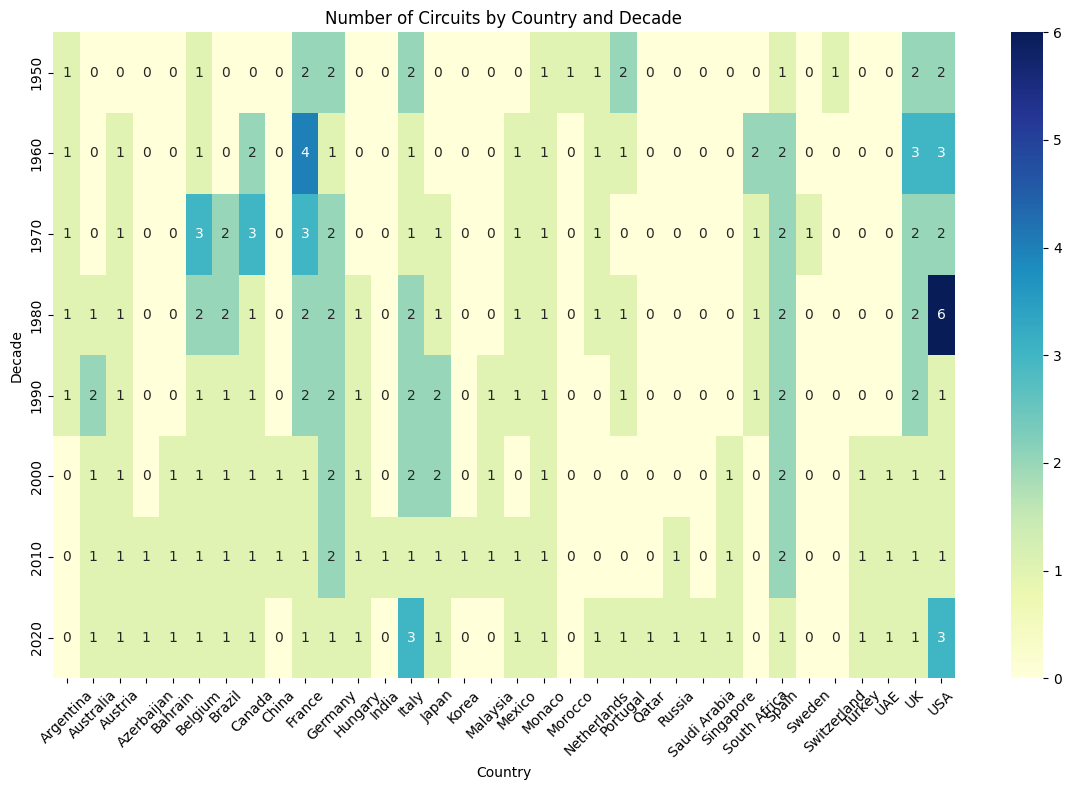

In [24]:
plt.figure(figsize=(12, 8))
sns.heatmap(circuit_decade_pivot, annot=True, cmap="YlGnBu", fmt=".0f")
plt.title('Number of Circuits by Country and Decade')
plt.ylabel('Decade')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

### Predictive Modeling

In [25]:
# Load your dataset
# Assuming your data is in a DataFrame called 'df'
# Drop columns that are not needed for the model
df = df.drop(['circuitId', 'url', 'circuitName', 'Location.lat', 'Location.long'], axis=1)

In [28]:
# Convert categorical variables to numerical using label encoding
label_encoder = LabelEncoder()
df['Location.locality'] = label_encoder.fit_transform(df['Location.locality'])
df['Location.country'] = label_encoder.fit_transform(df['Location.country'])

In [29]:
# Create a target variable for 2025 (1 if present, 0 if not)
df['CircuitPresence2025'] = (df['Year'] >= 2025).astype(int)

In [30]:
# Split the data into features (X) and target variable (y)
X = df.drop(['CircuitPresence2025'], axis=1)
y = df['CircuitPresence2025']

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a machine learning model (Random Forest Classifier in this case)
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [32]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [33]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


In [34]:
# Display additional metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       220

    accuracy                           1.00       220
   macro avg       1.00      1.00      1.00       220
weighted avg       1.00      1.00      1.00       220



In [35]:
# Example: Predict presence for Silverstone in 2025
silverstone_data = pd.DataFrame({'Location.locality': ['Silverstone'],
                                  'Location.country': ['United Kingdom'],
                                  'Year': [2025]})
silverstone_data['Location.locality'] = label_encoder.transform(silverstone_data['Location.locality'])
silverstone_data['Location.country'] = label_encoder.transform(silverstone_data['Location.country'])

ValueError: y contains previously unseen labels: 'Silverstone'

In [ ]:
prediction_2025 = model.predict(silverstone_data)
print(f'Prediction for Silverstone in 2025: {prediction_2025}')